In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc

In [71]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_rep_email from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
df = df.dropna()
df['inc_rep_email'] = df['inc_rep_email'].str.split("@",n=1,expand=True)[0]
df.head()

,inc_rep_email
2,SarahJane.Tafalla
3,sharon.cooper
4,manoloriera
5,vicki.fisher
6,vicki.fisher


In [72]:
email_counts = df['inc_rep_email'].value_counts(ascending=True)
df_counted = df
for email,count in email_counts.iteritems():
    if count <= 15:
        df_counted.loc[df_counted['inc_rep_email'] == email, 'inc_rep_email'] = 'Other'
email_counts_min = df_counted['inc_rep_email'].value_counts(ascending=True)
email_counts_min = email_counts_min.drop('Other')
print(email_counts_min)

jade.campbell             16
sarah.thomas              16
kelly.ford                16
sophie.lidstone           16
francesca.dipple          17
sara.brasalves            17
lynda.worley2             17
elizabeth.lane            17
louise.stacey             17
anthony.woodhouse         17
emma.hume                 17
colin.beevor              18
Eloise.Lavington          18
samantha.patterson        18
caroline.clokemanchip     18
rhys.jones                18
lucinda.fellows           18
max.williams              18
hannah.kingston           18
giuseppe.rufini           18
kay.wallace               18
joseph.tooley             19
louise.barker             20
alex.fletcher             20
luisa.banting             20
sarah.martin1             20
katherine.walpole         20
shivani.arora             21
grace.konadu              21
ANNIE.CURTIS              21
                        ... 
nazeer.ahmad              26
louise.wilson             27
janine.macdonald          28
mandy.houghton

<BarContainer object of 77 artists>

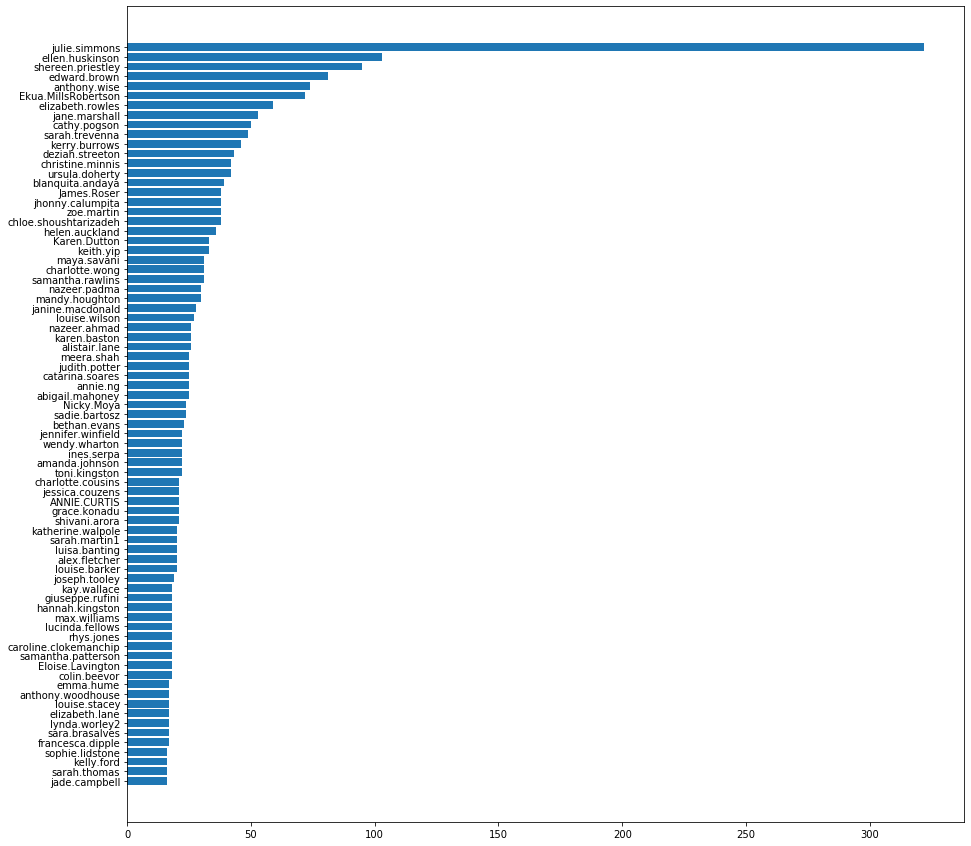

In [73]:
plt.figure(figsize=(15,15))
plt.barh(email_counts_min.index,email_counts_min.values)

1      1642
2       518
3       243
4       152
5        97
6        64
7        47
8        39
9        24
10       20
11       14
12       12
13       11
14       11
15        6
16        4
17        7
18       10
19        1
20        5
21        5
22        5
23        1
24        2
25        5
26        3
27        1
28        1
30        2
31        3
33        2
36        1
38        4
39        1
42        2
43        1
46        1
49        1
50        1
53        1
59        1
72        1
74        1
81        1
95        1
103       1
322       1
Name: inc_rep_email, dtype: int64
(0, 1]       1642
(1, 2]        518
(2, 3]        243
(3, 4]        152
(4, 5]         97
(5, 6]         64
(6, 7]         47
(7, 8]         39
(8, 9]         24
(9, 10]        20
(10, 11]       14
(11, 12]       12
(12, 13]       11
(13, 14]       11
(14, 15]        6
(15, 16]        4
(16, 17]        7
(17, 18]       10
(18, 20]        6
(20, 30]       25
(30, 40]       11
(40, 50]        6
(50, 8

<BarContainer object of 24 artists>

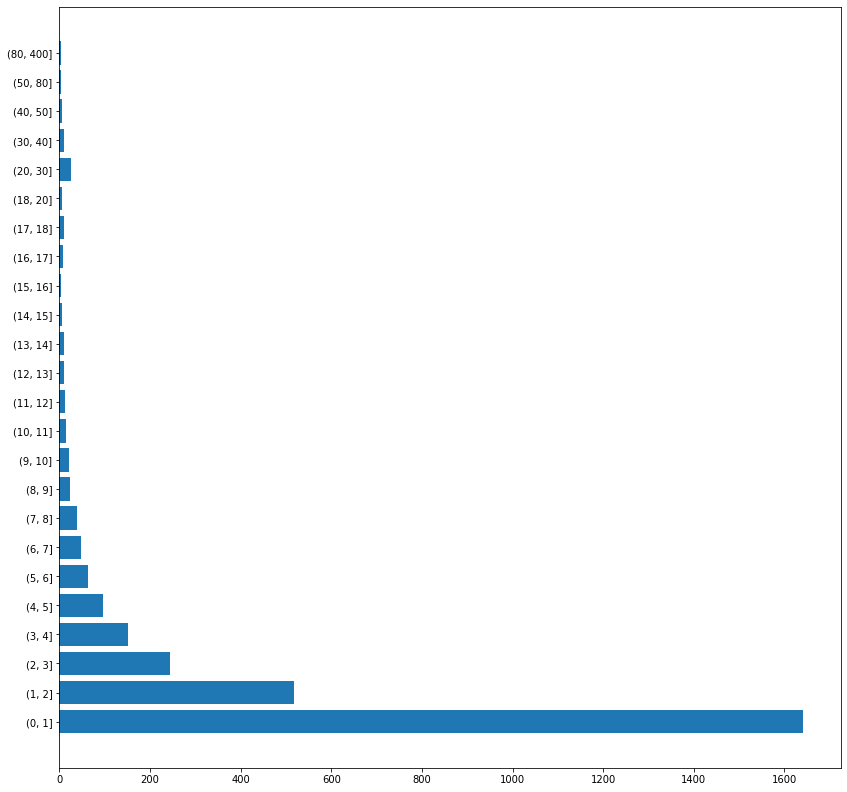

In [132]:
people_per_counts = email_counts.value_counts()[email_counts.unique()]
print(people_per_counts)
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,30,40,50,80,400]
people_per_counts_binned = people_per_counts.groupby(pd.cut(people_per_counts.index,bins)).sum()
print(people_per_counts_binned)
plt.figure(figsize=(14,14))
string_bins = people_per_counts_binned.index.astype(str)
print(string_bins)
plt.barh(string_bins,people_per_counts_binned.values)

In [172]:
cumulative_num_people = []
cumulative_percentages = []
num_people = people_per_counts.values.sum()
percentage = 100
for i in range(len(people_per_counts)):
    cumulative_num_people.append(str(num_people))
    num_people -= people_per_counts.values[i]
    cumulative_percentages.append(percentage)
    percentage -= 100*people_per_counts.index[i]*people_per_counts.values[i]/email_counts.values.sum()
red_percentages = [100-percentage for percentage in cumulative_percentages]

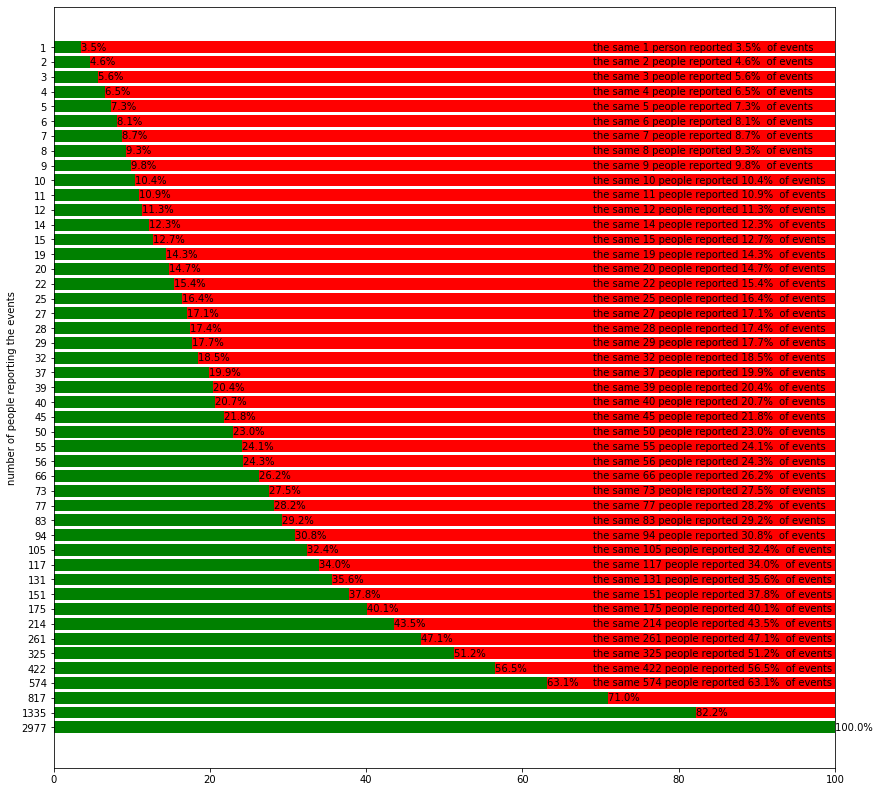

In [217]:
plt.figure(figsize=(14,14))
plt.barh(cumulative_num_people,cumulative_percentages,color='g')
plt.barh(cumulative_num_people,red_percentages,left=cumulative_percentages,color='r')
plt.ylabel('number of people reporting the events')
for i, percentage in enumerate(cumulative_percentages):
    plt.text(percentage,i-0.2,"{0:.1f}% ".format(percentage))
    if int(cumulative_num_people[i])!=1 and i>2: 
        plt.text(69,i-0.2,"the same "+cumulative_num_people[i]+" people reported "+"{0:.1f}% ".format(percentage)+" of events")
plt.text(69,len(cumulative_percentages)-1-0.2,"the same 1 person reported "+"{0:.1f}% ".format(percentage)+" of events");